In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import tensorflow as tf
# from tensorflow import keras
import cv2
import snappy
import numpy as np
import random as rn
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
np.random.seed(4321)
rn.seed(4321)
tf.random.set_seed(4321)

In [2]:
water_veg_mask = np.load(r'D:\workspace\jupyterNotebooks\Remote Sensing\Water-Segmentation\data\water_mask_R019_T43PGQ.npy')
# shape = water_veg_mask.shape


In [3]:
# print(water_veg_mask.shape)

In [4]:
# water_veg_mask[0]

In [5]:
water_veg_mask = water_veg_mask.flatten()

In [6]:
product_path = r'D:\Datasets\satellite\reflectance\subset_1_of_S2A_MSIL2A_20210304T050711_N0214_R019_T43PGQ_20210304T082332_resampled.dim'

In [7]:
product = snappy.ProductIO.readProduct(product_path)
width = product.getSceneRasterWidth()
height = product.getSceneRasterHeight()

In [8]:
# B2 = product.getBand('B2')
# B3 = product.getBand('B3_S')
# B4 = product.getBand('B4_S')
# B5 = product.getBand('B5')
# B6 = product.getBand('B6')
# B7 = product.getBand('B7_S')
# B8 = product.getBand('B8_S')
# B8A = product.getBand('B8A_S')
B11 = product.getBand('B11')
# B12 = product.getBand('B12_S')

In [9]:
# B2_pixels = np.zeros(width * height, np.float32)
# B2.readPixels(0,0,width,height,B2_pixels)
# # B2_pixels.flatten()

# B3_pixels = np.zeros(width * height, np.float32)
# B3.readPixels(0,0,width,height,B3_pixels)
# B3_pixels.flatten()
# 
# B4_pixels = np.zeros(width * height, np.float32)
# B4.readPixels(0,0,width,height,B4_pixels)
# B4_pixels.flatten()

# B5_pixels = np.zeros(width * height, np.float32)
# B5.readPixels(0,0,width,height,B5_pixels)

# B6_pixels = np.zeros(width * height, np.float32)
# B6.readPixels(0,0,width,height,B6_pixels)

# B7_pixels = np.zeros(width * height, np.float32)
# B7.readPixels(0,0,width,height,B7_pixels)

# B8_pixels = np.zeros(width * height, np.float32)
# B8.readPixels(0,0,width,height,B8_pixels)
# B8_pixels.flatten()

# B8A_pixels = np.zeros(width * height, np.float32)
# B8A.readPixels(0,0,width,height,B8A_pixels)

B11_pixels = np.zeros(width * height, np.float32)
B11.readPixels(0,0,width,height,B11_pixels)

# B12_pixels = np.zeros(width * height, np.float32)
# B12.readPixels(0,0,width,height,B12_pixels)

array([0.1891, 0.1891, 0.2134, ..., 0.2066, 0.2066, 0.4614], dtype=float32)

In [10]:
# x_cols = ['B2','B3','B4','B5','B6','B7','B8','B8A','B11','B12']
# x_cols = [ 'B11']

In [11]:
X_val = pd.DataFrame({
#                 'B2':B2_pixels, 
#                    'B3': B3_pixels,
#                    'B4': B4_pixels,
#                    'B5': B5_pixels,
#                    'B6': B6_pixels,
#                    'B7': B7_pixels,
#                    'B8': B8_pixels,
#                    'B8A': B8A_pixels,
                   'B11': B11_pixels,
#                    'B12': B12_pixels,
                    })
X_val.shape
# y_val = to_categorical(water_veg_mask,num_classes=2)
# y_val = water_veg_mask

(654481, 1)

In [12]:
# y_val = y_val.astype('float32')

In [13]:
def create_model():
    model = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(1,)),
#             tf.keras.layers.experimental.preprocessing.Normalization(),
            tf.keras.layers.Dense(32, activation="relu"),
#             tf.keras.layers.Dropout(0.4),
            tf.keras.layers.Dense(32, activation="relu"),
            tf.keras.layers.Dropout(0.4),
#             tf.keras.layers.Dense(32, activation="relu"),
            tf.keras.layers.Dense(1, activation="sigmoid")
            
            
        ]
        )
    model.compile(
        loss=[tf.keras.losses.BinaryCrossentropy()],
        optimizer=tf.keras.optimizers.Adam(1e-4),
        metrics=[tf.keras.metrics.BinaryAccuracy()],
    )
    return model

In [14]:
# Create a new model instance
model = create_model()

In [15]:
# Restore the weights
model.load_weights('D:\workspace\jupyterNotebooks\Remote Sensing\Water-Segmentation\data\9_B11_ANN_S_BC')

In [6]:
water_mask = [0,0,255]
# veg_mask = [0,128,0]
# masked_image = [[0 for i in range(image.shape[0])] for j in range(image.shape[1])]

In [7]:
def make_map(array):
    res = [[0,0,0] for i in range(len(array))]
    for i in range(len(array)):
        if(array[i] == 1):
            res[i] = [0,0,255]
    return res

In [8]:
image = make_map(water_veg_mask)
image = np.array(image)
image = np.reshape(image, (809,809,3))

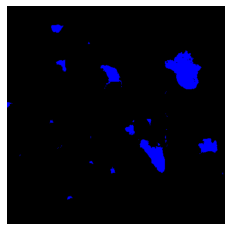

In [9]:
plt.imshow(image)
plt.axis('off')
plt.show()

In [70]:
# unique, counts = np.unique(image, return_counts=True)

In [71]:
# image

In [72]:
clf_y_pred = model.predict(X_val)
clf_y_pred = [1 if x > 0.5 else 0 for x in clf_y_pred]
clf_y_pred = np.array(clf_y_pred)

In [73]:
pred_image = make_map(clf_y_pred)
pred_image = np.array(pred_image)
pred_image = np.reshape(pred_image, (809,809,3))

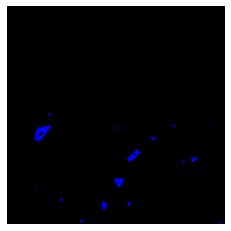

In [74]:
plt.imshow(pred_image)
plt.axis('off')
plt.show()

In [2]:
def show_confusion_matrix(y_test, y_pred, score):    
    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    return cm
def get_miou(cm):
    col_sums = cm.sum(axis=0)
    row_sums = cm.sum(axis=1)
    iou = 0.0
    c = 0
    for i in range(len(cm)):
        tp = cm[i,i]
        denominator = (col_sums[i]+row_sums[i] - tp)
        if denominator != 0:
            c +=1
            iou += tp/denominator
    return iou/c
def find_padding(v, divisor=32):
    v_divisible = max(divisor, int(divisor * np.ceil( v / divisor )))
    total_pad = v_divisible - v
    pad_1 = total_pad // 2
    pad_2 = total_pad - pad_1
    return pad_1, pad_2

In [31]:
def get_image_stats(seg_map_path):
    seg_image_raw = cv2.imread(seg_map_path,cv2.IMREAD_UNCHANGED)
    seg_image = cv2.cvtColor(seg_image_raw,cv2.COLOR_BGR2RGB)
    print(seg_image)
    seg_masked_image = [[0 for i in range(seg_image.shape[0])] for j in range(seg_image.shape[1])]
    water_mask = [255,255,255]
    for row in range(seg_image.shape[0]):
        for col in range(seg_image.shape[1]):
            if seg_image[row][col][0] != 0 and seg_image[row][col][1] != 0 and seg_image[row][col][2] != 0:
                    seg_masked_image[row][col] = 1
    # predict_label_ak=np.argmax(clf_y_pred,axis=1)
    
    seg_masked_image = np.array(seg_masked_image).flatten()
    length=len(seg_masked_image)
    accuracy_ak=np.sum(water_veg_mask==seg_masked_image)/length * 100 
    return [seg_masked_image, accuracy_ak]
    #cm = show_confusion_matrix(y_test = water_veg_mask, y_pred = seg_masked_image, score = accuracy_ak)

In [32]:
seg_map_path_deepwatermapv2 = r'D:\workspace\Forks\deepwatermap\test_map.png'
seg_map_path_watnet = r'D:\workspace\Forks\WatNet\data\test2.png'

In [33]:
# seg_image_raw = cv2.imread(seg_map_path,cv2.IMREAD_UNCHANGED)
# seg_image = cv2.cvtColor(seg_image_raw,cv2.COLOR_BGR2RGB)
# seg_masked_image = [[0 for i in range(seg_image.shape[0])] for j in range(seg_image.shape[1])]
# water_mask = [255,255,255]

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [1 1 1]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [1 1 1]
  [1 1 1]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [2 2 2]
  [2 2 2]
  [1 1 1]]

 [[0 0 0]
  [0 0 0]
  [1 1 1]
  ...
  [2 2 2]
  [2 2 2]
  [1 1 1]]

 [[0 0 0]
  [1 1 1]
  [1 1 1]
  ...
  [3 3 3]
  [2 2 2]
  [2 2 2]]]


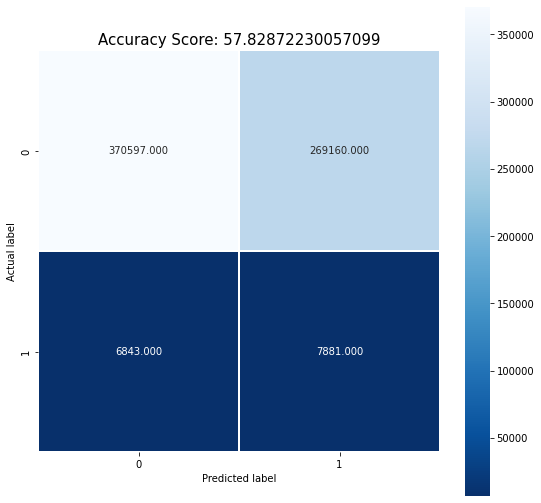

In [34]:
# for row in range(seg_image.shape[0]):
#     for col in range(seg_image.shape[1]):
#         if seg_image[row][col][0] == water_mask[0] and image[row][col][1] == water_mask[1] \
#             and seg_image[row][col][2] == water_mask[2]:
#                 seg_masked_image[row][col] = 1
# # predict_label_ak=np.argmax(clf_y_pred,axis=1)
# length=len(water_veg_mask)
# seg_masked_image = np.array(seg_masked_image).flatten()
# accuracy_ak=np.sum(water_veg_mask==seg_masked_image)/length * 100 
seg_masked_image, accuracy_ak = get_image_stats(seg_map_path_deepwatermapv2)
cm = show_confusion_matrix(y_test = water_veg_mask, y_pred = seg_masked_image, score = accuracy_ak)

In [35]:
ann_miou = get_miou(cm)
print(ann_miou)

0.3004542854059449


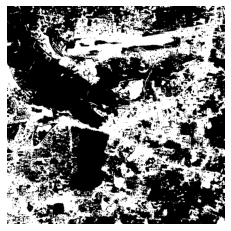

In [36]:
pred_image = np.array(seg_masked_image)
pred_image = np.reshape(pred_image, (809,809,1))
plt.imshow(pred_image, cmap='gray')
plt.axis('off')
plt.show()

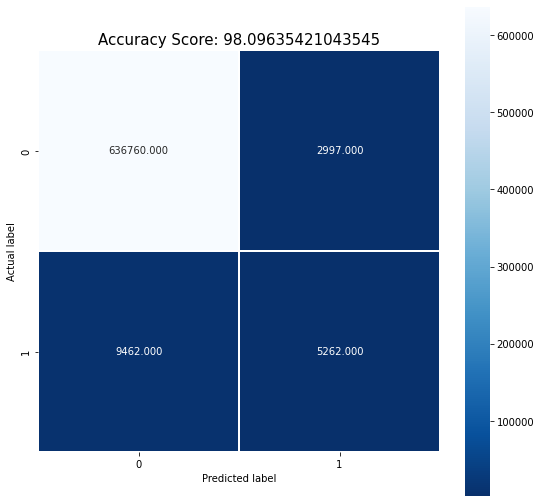

In [14]:
seg_masked_image, accuracy_ak = get_image_stats(seg_map_path_watnet)
cm = show_confusion_matrix(y_test = water_veg_mask, y_pred = seg_masked_image, score = accuracy_ak)


In [15]:
ann_miou = get_miou(cm)
print(ann_miou)

0.6388725440512384
